# Content and Objective

+ Illustrate effects of estimation in the "temperature" example
+ Experiments are observed and resulting estimations are shown

# Importing

In [1]:
# importing
import numpy as np

from scipy import stats, special


import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# values ("temperature")
vartheta = 1.5

# noise variance
sigma2 = 1

# observation length for estimation
# NOTE: corresponding to N out of the lecture
N = 50 

# number of trials for estimation expection of the estimator
# NOTE: not relativ to observation length
N_trials = int( 1e4 )

# Simulations

In [4]:
# sample random values
# Note: 2-dim arrays are sampled in which
#       first dimension describes N realizations used for determining the estimator
#       second dimension realizes N_trials used for averaging w.r.t. different estimation outcomes
X_samples = vartheta + np.sqrt( sigma2 ) * np.random.randn( N, N_trials )

# determine average w.r.t. to first dimension = axis 0 
X_average = np.average( X_samples, axis=0 )

### Show histogram of estimated values

Text(0.5, 1.0, 'Histogram of estimated values')

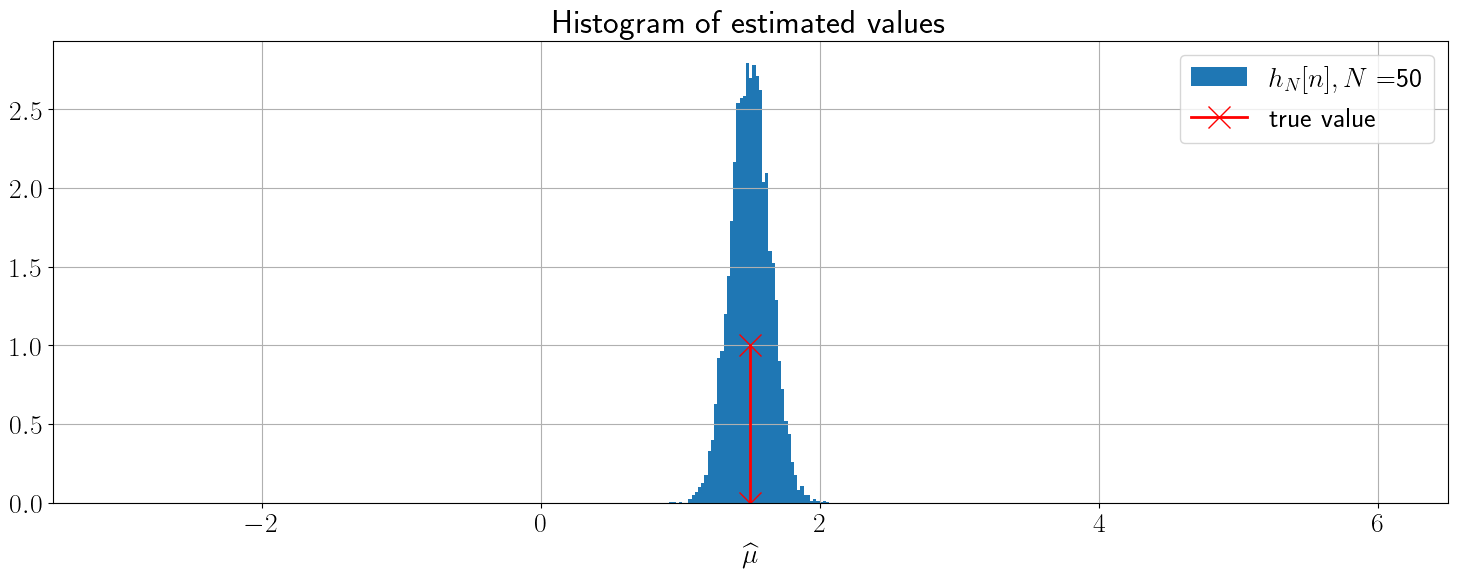

In [5]:
plt.hist( X_average, bins=50, density=1, label='$h_{N}[n], N=$'+str(N) )
plt.plot( [ vartheta, vartheta], [0, 1], '-x', color='red', ms=16, linewidth=2.0, label='true value')

plt.xlim( ( vartheta - 5, vartheta + 5) )
plt.xlabel('$\widehat{\mu}$')
plt.grid( 1 )
plt.legend( )
plt.title('Histogram of estimated values')

### Check if estimator is unbiased

In [6]:
# determine E( estimator ) 
E_T = np.average( X_average )
V_T = np.var( X_average )

print(' Expectation of estimator - theory: \t{}'.format( vartheta ) )
print(' Average of estimators: \t\t{}\n'.format( E_T ) )

print(' Variance of estimator -  theory: \t{:2.7f}'.format( sigma2 / N ) )
print(' Variance of estimators: \t\t{:2.7f}'.format( V_T ) )

 Expectation of estimator - theory: 	1.5
 Average of estimators: 		1.5010850271782683

 Variance of estimator -  theory: 	0.0200000
 Variance of estimators: 		0.0196040


### Show behavior of MMSE estimator

In [7]:
# define SNR region in dB and map to noise variance
# Note: You don't need to follow those lines
SNR_dB = np.arange( -25, 26, 1 )  
SNR_lin = 10**( SNR_dB / 10 )
sigma2 = 1 / SNR_lin 

In [8]:
# init MSE
MSE_average = np.zeros_like( sigma2 )
MSE_MMSE = np.zeros_like( sigma2 )

# loop for SNR and determine E ( (b_est - b)^2 ) by averaging along "many" realization
for ind_sigma2, val_sigma2 in enumerate( sigma2 ):

    X_samples = vartheta + np.sqrt( val_sigma2 ) * np.random.randn( N, N_trials )

    X_average = np.average( X_samples, axis=0 )

    X_MMSE = N / ( N + 1/SNR_lin[ ind_sigma2 ] ) * X_average

    MSE_average[ ind_sigma2 ] = np.average( ( X_average - vartheta )**2 )
    MSE_MMSE[ ind_sigma2 ] = np.average( ( X_MMSE - vartheta )**2 )


Text(0.5, 0, 'SNR (dB)')

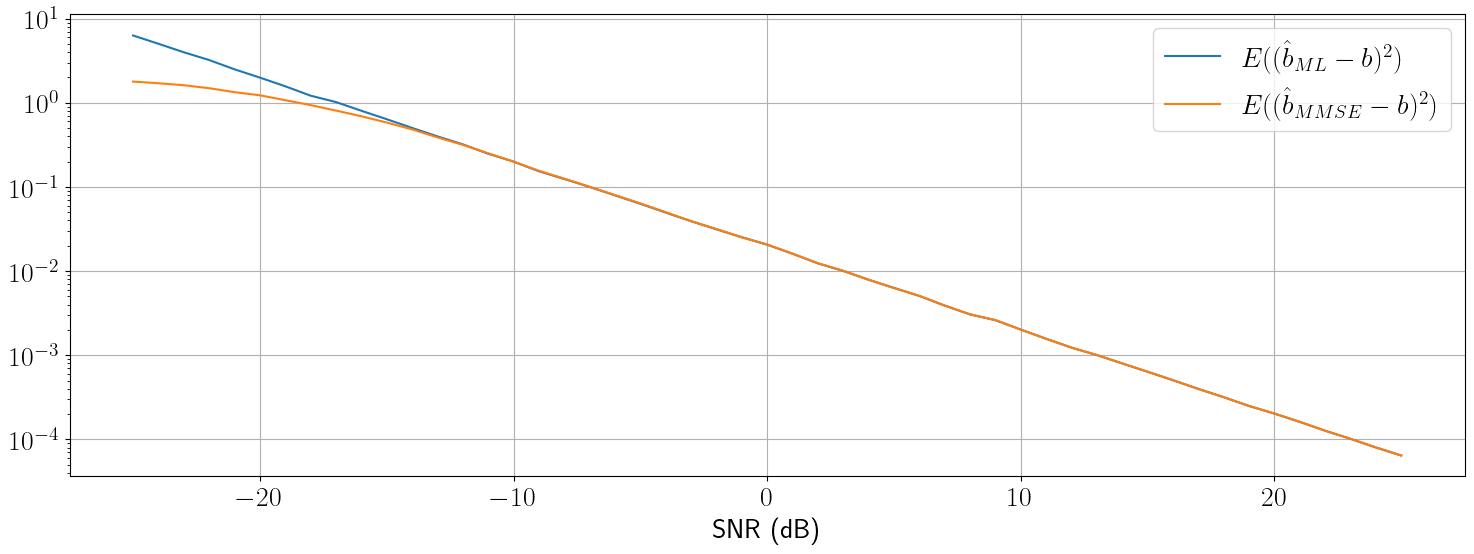

In [9]:
plt.semilogy( SNR_dB, MSE_average, label='$E((\hat{b}_{ML}-b)^2)$' )
plt.semilogy( SNR_dB, MSE_MMSE, label='$E((\hat{b}_{MMSE}-b)^2)$' )


plt.grid(1)
plt.legend()
plt.xlabel('SNR (dB)')
